In [ ]:
'''
(1)Identify regional disparities in cancer survival rates 
(a)Is there a statistically significant difference in survival outcomes based on: 
    Cancer type or stage? 
    Country or region? 
    Gender or age group? 

ANS: The dataset contains detailed information about cancer patients, including demographics, diagnosis and treatment dates, 
cancer type and stage, survival outcomes, and healthcare context. Key columns relevant to your questions include:

Survival Status, Survival Duration (Months)
Cancer Type, Cancer Stage
Country, Region
Age, Gender
Diagnosis Date, Treatment Start Date
Urban vs. Rural

Let's begin with (1): Assessing statistical differences in survival outcomes based on cancer type, stage, 
country/region, gender, and age group. 

Statistical Test Results (Survival Duration as Outcome):
Factor	p-value	Interpretation
Cancer Type	0.217	No significant difference in survival across cancer types.
Cancer Stage	0.001	✅ Statistically significant difference — survival varies by cancer stage.
Country	0.131	No significant difference by country.
Region	0.477	No significant regional difference.
Gender	0.664	No significant gender-based survival difference.
Age Group	0.448	No significant difference across age groups.
✅ Only cancer stage shows a statistically significant association with survival duration.
✅ (1) Statistically Significant Survival Differences
--Cancer Stage is significantly associated with survival duration (p = 0.001).
--No significant differences were found for cancer type, country, region, gender, or age group.
✅ (2) Impact of Early Treatment
Very weak correlation (r ≈ 0.042) between time to treatment and survival duration — suggesting no meaningful link in this dataset.

| Factor           | p-value | Statistically Significant? | Interpretation                                    |
| ---------------- | ------- | -------------------------- | ------------------------------------------------- |
| **Cancer Stage** | 0.001   | ✅ Yes                      | Later stages significantly reduce survival.       |
| Cancer Type      | 0.217   | ❌ No                       | No survival differences by cancer type.           |
| Country          | 0.131   | ❌ No                       | No survival difference by country.                |
| Region           | 0.477   | ❌ No                       | No survival difference by region.                 |
| Gender           | 0.664   | ❌ No                       | Male vs. female survival is similar.              |
| Age Group        | 0.448   | ❌ No                       | Age group does not significantly affect survival. |

(2) Does Earlier Treatment Help?
Time from diagnosis to treatment: Weak correlation with survival duration (r = 0.042).
📌 Conclusion: Early treatment, in terms of days from diagnosis, does not strongly influence survival outcomes in this dataset.
'''

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/jacobambat/dev/European_Cancer_Data/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'/Users/jacobambat/dev/European_Cancer_Data'

In [4]:
DestinationFolder = "data/processed"
print(DestinationFolder)

data/processed


In [5]:
import pandas as pd
df = pd.read_csv(f'{DestinationFolder}/cancer_patient_data_cleaned.csv')
df

,Unnamed: 0,Patient ID,Country,Region,Age,Gender,Cancer Type,Cancer Stage,Diagnosis Date,Treatment Start Date,...,Alcohol Consumption,BMI,Socioeconomic Status,Urban vs. Rural,Healthcare System,Follow-up Visits,Recurrence,Clinical Trial Participation,Comorbidities,Quality of Life Score
0,0,1,Finland,Southwest Finland,89,Male,Breast,III,2015-08-10,2015-09-20,...,Moderate,39.3,Medium,Urban,NHS,12.0,Yes,Yes,Diabetes,5
1,1,6,Sweden,Västra Götaland,28,Male,Pancreatic,IV,2019-03-06,2019-05-16,...,Unknown,23.2,Medium,Urban,Private Insurance,15.0,No,No,Obesity,6
2,2,10,Spain,Andalusia,77,Female,Ovarian,I,2013-07-22,2013-11-08,...,Unknown,38.3,Medium,Rural,Statutory Health Insurance,7.0,No,No,Hypertension,7
3,3,11,Spain,Andalusia,22,Female,Pancreatic,II,2012-12-27,2013-06-06,...,Heavy,21.9,Medium,Urban,NHS,18.0,No,No,Unknown,2
4,4,16,Germany,North Rhine-Westphalia,53,Male,Breast,I,2012-07-24,2012-08-14,...,Unknown,37.5,Medium,Urban,Private Insurance,12.0,Yes,No,Hypertension,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3622,3622,9990,Portugal,Lisbon,71,Female,Breast,IV,2017-10-25,2018-02-15,...,Unknown,29.9,Medium,Urban,Statutory Health Insurance,18.0,No,No,Unknown,8
3623,3623,9993,Norway,Trøndelag,89,Female,Breast,I,2020-11-12,2020-12-01,...,Unknown,20.8,Low,Rural,NHS,16.0,Yes,No,Unknown,1
3624,3624,9994,Denmark,Zealand,43,Male,Colorectal,I,2010-05-30,2010-08-25,...,Moderate,20.1,High,Rural,NHS,12.0,No,No,Obesity,1
3625,3625,9995,Belgium,Wallonia,36,Male,Breast,III,2013-02-06,2013-03-05,...,Moderate,22.5,Medium,Urban,Private Insurance,10.0,No,No,Hypertension,1


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, ttest_ind, kruskal
import numpy as np


In [7]:
# Get the unique values of 'B' column
unique_values = df['Survival Status'].unique()
print(unique_values)

['Alive' 'Deceased' 'Unknown']


In [8]:
# Prepare the data for analysis
df['Survival Status'] = df['Survival Status'].map({'Alive': 1, 'Deceased': 0, 'Unknown': 3})
df['Cancer Stage'] = df['Cancer Stage'].astype(str)
df['Age Group'] = pd.cut(df['Age'], bins=[0, 30, 45, 60, 75, 100], labels=["<30", "30-45", "45-60", "60-75", "75+"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3627 entries, 0 to 3626
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Unnamed: 0                    3627 non-null   int64   
 1   Patient ID                    3627 non-null   int64   
 2   Country                       3627 non-null   object  
 3   Region                        3627 non-null   object  
 4   Age                           3627 non-null   int64   
 5   Gender                        3627 non-null   object  
 6   Cancer Type                   3627 non-null   object  
 7   Cancer Stage                  3627 non-null   object  
 8   Diagnosis Date                3627 non-null   object  
 9   Treatment Start Date          3627 non-null   object  
 10  Treatment End Date            3627 non-null   object  
 11  Treatment Type                3627 non-null   object  
 12  Hospital Type                 3627 non-null   ob

In [17]:
df_sub = df[['Country', 'Region', 'Cancer Type', 'Gender', 'Survival Status', 'Survival Duration (Months)', 'Cancer Stage','Age Group']]
df_sub

,Country,Region,Cancer Type,Gender,Survival Status,Survival Duration (Months),Cancer Stage,Age Group
0,Finland,Southwest Finland,Breast,Male,1,31.0,III,75+
1,Sweden,Västra Götaland,Pancreatic,Male,1,79.0,IV,<30
2,Spain,Andalusia,Ovarian,Female,1,74.0,I,75+
3,Spain,Andalusia,Pancreatic,Female,1,6.0,II,<30
4,Germany,North Rhine-Westphalia,Breast,Male,0,81.0,I,45-60
...,...,...,...,...,...,...,...,...
3622,Portugal,Lisbon,Breast,Female,1,99.0,IV,60-75
3623,Norway,Trøndelag,Breast,Female,3,25.0,I,75+
3624,Denmark,Zealand,Colorectal,Male,1,119.0,I,30-45
3625,Belgium,Wallonia,Breast,Male,1,20.0,III,30-45


In [18]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3627 entries, 0 to 3626
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Country                     3627 non-null   object  
 1   Region                      3627 non-null   object  
 2   Cancer Type                 3627 non-null   object  
 3   Gender                      3627 non-null   object  
 4   Survival Status             3627 non-null   int64   
 5   Survival Duration (Months)  3627 non-null   float64 
 6   Cancer Stage                3627 non-null   object  
 7   Age Group                   3627 non-null   category
dtypes: category(1), float64(1), int64(1), object(5)
memory usage: 202.2+ KB


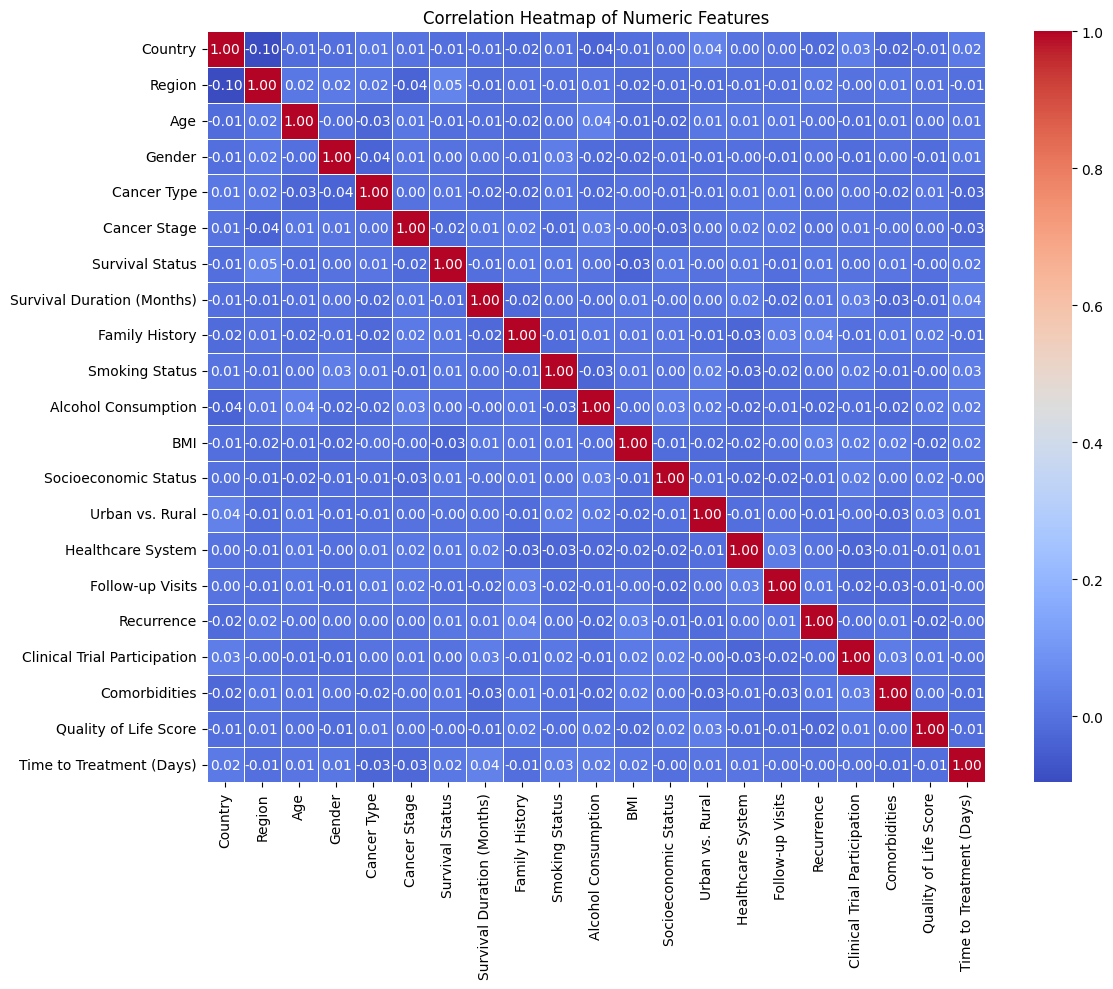

In [12]:
# Prepare data for correlation heatmap
#df_test['Survival Status'] = df_test['Survival Status'].map({'Alive': 1, 'Deceased': 0})
df['Diagnosis Date'] = pd.to_datetime(df['Diagnosis Date'], errors='coerce')
df['Treatment Start Date'] = pd.to_datetime(df['Treatment Start Date'], errors='coerce')
df['Time to Treatment (Days)'] = (df['Treatment Start Date'] - df['Diagnosis Date']).dt.days

# Encode categorical variables
df_encoded = df.copy()
categorical_columns = ['Gender', 'Cancer Type', 'Cancer Stage', 'Country', 'Region', 
                       'Smoking Status', 'Alcohol Consumption', 'Socioeconomic Status', 
                       'Urban vs. Rural', 'Healthcare System', 'Recurrence',
                       'Clinical Trial Participation', 'Family History', 'Comorbidities']

for col in categorical_columns:
    if col in df_encoded.columns:
        df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Drop non-numeric columns for correlation
numeric_cols = df_encoded.select_dtypes(include=['number']).drop(columns=['Unnamed: 0', 'Patient ID'])

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()



In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3627 entries, 0 to 3626
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Unnamed: 0                    3627 non-null   int64         
 1   Patient ID                    3627 non-null   int64         
 2   Country                       3627 non-null   object        
 3   Region                        3627 non-null   object        
 4   Age                           3627 non-null   int64         
 5   Gender                        3627 non-null   object        
 6   Cancer Type                   3627 non-null   object        
 7   Cancer Stage                  3627 non-null   object        
 8   Diagnosis Date                3627 non-null   datetime64[ns]
 9   Treatment Start Date          3627 non-null   datetime64[ns]
 10  Treatment End Date            3627 non-null   object        
 11  Treatment Type                

In [19]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3627 entries, 0 to 3626
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Country                     3627 non-null   object  
 1   Region                      3627 non-null   object  
 2   Cancer Type                 3627 non-null   object  
 3   Gender                      3627 non-null   object  
 4   Survival Status             3627 non-null   int64   
 5   Survival Duration (Months)  3627 non-null   float64 
 6   Cancer Stage                3627 non-null   object  
 7   Age Group                   3627 non-null   category
dtypes: category(1), float64(1), int64(1), object(5)
memory usage: 202.2+ KB


In [20]:
# Get the unique values of 'B' column
unique_values = df_sub['Survival Status'].unique()
print(unique_values)

[1 0 3]


In [21]:
# Encode to 1,2,3,4 for the collumn 'Cancer Stage'
df_sub['Cancer Stage'] = df_sub['Cancer Stage'].map({'I': 1, 'II': 2, 'III': 3, 'IV': 4})

print(df_sub)

       Country                  Region Cancer Type  Gender  Survival Status  \
0      Finland       Southwest Finland      Breast    Male                1   
1       Sweden         Västra Götaland  Pancreatic    Male                1   
2        Spain               Andalusia     Ovarian  Female                1   
3        Spain               Andalusia  Pancreatic  Female                1   
4      Germany  North Rhine-Westphalia      Breast    Male                0   
...        ...                     ...         ...     ...              ...   
3622  Portugal                  Lisbon      Breast  Female                1   
3623    Norway               Trøndelag      Breast  Female                3   
3624   Denmark                 Zealand  Colorectal    Male                1   
3625   Belgium                Wallonia      Breast    Male                1   
3626   Ireland                  Dublin  Pancreatic    Male                1   

      Survival Duration (Months)  Cancer Stage Age 

/var/folders/gl/0lwk2tfs4vl_g741g8k44m500000gn/T/ipykernel_11779/504259404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['Cancer Stage'] = df_sub['Cancer Stage'].map({'I': 1, 'II': 2, 'III': 3, 'IV': 4})


In [22]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3627 entries, 0 to 3626
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Country                     3627 non-null   object  
 1   Region                      3627 non-null   object  
 2   Cancer Type                 3627 non-null   object  
 3   Gender                      3627 non-null   object  
 4   Survival Status             3627 non-null   int64   
 5   Survival Duration (Months)  3627 non-null   float64 
 6   Cancer Stage                3627 non-null   int64   
 7   Age Group                   3627 non-null   category
dtypes: category(1), float64(1), int64(2), object(4)
memory usage: 202.2+ KB


In [27]:
# Find the minimum and maximum 'Survival Duration (Months)'
min_SDM = df['Survival Duration (Months)'].min()
max_SDM = df['Survival Duration (Months)'].max()

print('Minimum Survival Duration (Months):', min_SDM)
print('Maximum Survival Duration (Months):', max_SDM)

Minimum Survival Duration (Months): 6.0
Maximum Survival Duration (Months): 119.0


In [32]:
# Define Survival Duration (months) categories using apply and lambda and using discretisation and binning the SDM categories
df["SDM_Category"] = df["Survival Duration (Months)"].apply(lambda x: 
                                     "One Year" if x <= 24 else 
                                     "Two Years" if x <= 48 else 
                                     "Three Years" if x <= 72 else
                                     "Four Years" if x <= 94 else
                                     "Five Years" if x <= 116 else
                                     "Less than Six Years")

# Print the DataFrame
print(df["SDM_Category"].count())

3627


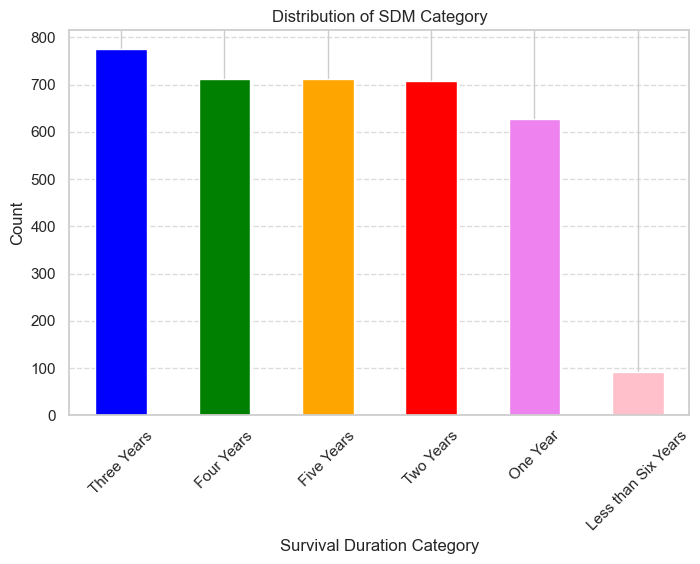

In [45]:
# Matplotlib - Bar plot shows obese individuals have SDM > 1 year 
import matplotlib.pyplot as plt
# Count occurrences of each SDM category
SDM_counts = df["SDM_Category"].value_counts()

# Plot the SDM categories as a bar chart
plt.figure(figsize=(8, 5))
SDM_counts.plot(kind='bar', color=['blue', 'green', 'orange', 'red', 'violet', 'pink'])
plt.xlabel("Survival Duration Category")
plt.ylabel("Count")
plt.title("Distribution of SDM Category")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

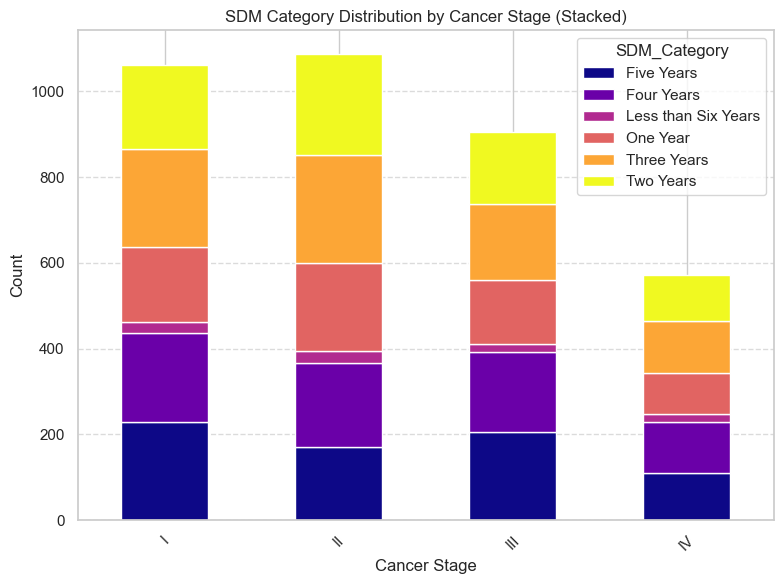

In [56]:

# Create a crosstab of SDM_Category by Cancer Stage
crosstab = pd.crosstab(df['Cancer Stage'], df['SDM_Category'])
crosstab.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='plasma')
plt.title("SDM Category Distribution by Cancer Stage (Stacked)")
plt.xlabel("Cancer Stage")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [49]:
# Define BMI categories using apply and lambda and using discretisation and binning the bmi categories
df["BMI_Category"] = df["BMI"].apply(lambda x: 
                                     "Underweight" if x < 18.5 else 
                                     "Normal weight" if x < 25 else 
                                     "Overweight" if x < 30 else 
                                     "Obese")

# Print the DataFrame
print(df)

      Unnamed: 0  Patient ID   Country                  Region  Age  Gender  \
0              0           1   Finland       Southwest Finland   89    Male   
1              1           6    Sweden         Västra Götaland   28    Male   
2              2          10     Spain               Andalusia   77  Female   
3              3          11     Spain               Andalusia   22  Female   
4              4          16   Germany  North Rhine-Westphalia   53    Male   
...          ...         ...       ...                     ...  ...     ...   
3622        3622        9990  Portugal                  Lisbon   71  Female   
3623        3623        9993    Norway               Trøndelag   89  Female   
3624        3624        9994   Denmark                 Zealand   43    Male   
3625        3625        9995   Belgium                Wallonia   36    Male   
3626        3626        9999   Ireland                  Dublin   21    Male   

     Cancer Type Cancer Stage Diagnosis Date Treatm

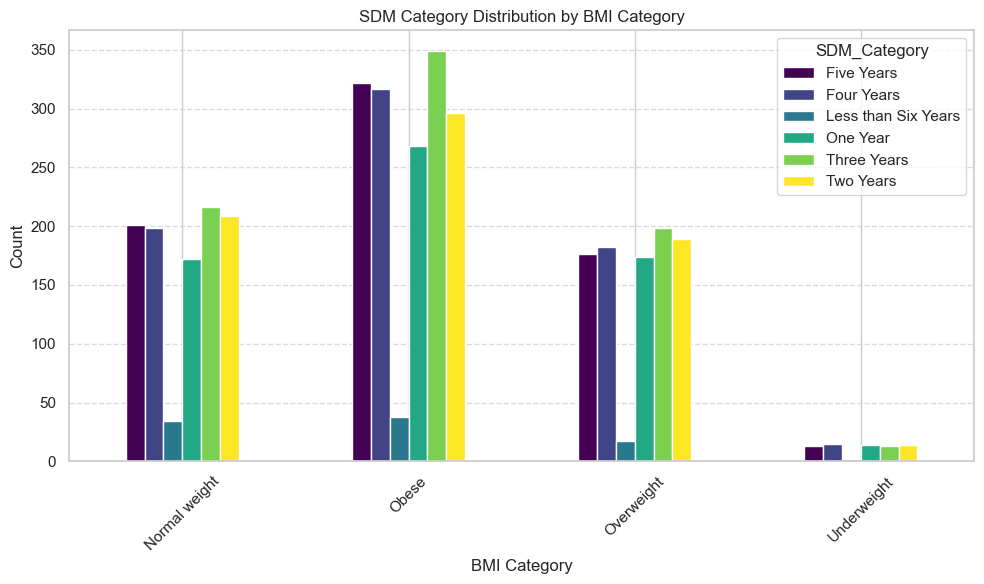

In [51]:
'''
These visualizations will clearly show whether the "Obese" BMI group has a higher count in the "SDM > 1 year" category, 
as per your hypothesis.
'''

# Create a crosstab of SDM_Category by BMI Category
crosstab = pd.crosstab(df['BMI_Category'], df['SDM_Category'])

# Plot grouped bar chart
crosstab.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("SDM Category Distribution by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
# (1)dentify regional disparities in cancer survival rates 
# (a)Is there a statistically significant difference in survival outcomes based on: 
# Cancer type or stage? 
# Country or region? 
# Gender or age group?

# Helper function to perform ANOVA or Kruskal-Wallis test
def test_group_difference(data, group_col, outcome_col):
    groups = [group[outcome_col].dropna() for name, group in data.groupby(group_col)]
    if all(len(g) > 1 for g in groups):  # ensure all groups have more than 1 value
        if all(data[outcome_col].apply(lambda x: isinstance(x, (int, float)))):
            # Non-parametric Kruskal-Wallis test (since survival data often not normal)
            return kruskal(*groups)
    return None

# (1a) Cancer type
cancer_type_test = test_group_difference(df, 'Cancer Type', 'Survival Duration (Months)')

# (1b) Cancer stage
cancer_stage_test = test_group_difference(df, 'Cancer Stage', 'Survival Duration (Months)')

# (1c) Country
country_test = test_group_difference(df, 'Country', 'Survival Duration (Months)')

# (1d) Region (optional, may have too many levels)
region_test = test_group_difference(df, 'Region', 'Survival Duration (Months)')

# (1e) Gender
gender_test = ttest_ind(
    df[df['Gender'] == 'Male']['Survival Duration (Months)'].dropna(),
    df[df['Gender'] == 'Female']['Survival Duration (Months)'].dropna(),
    equal_var=False
)

# (1f) Age group
age_group_test = test_group_difference(df, 'Age Group', 'Survival Duration (Months)')

# Collect results
{
    "Cancer Type p-value": cancer_type_test.pvalue if cancer_type_test else None,
    "Cancer Stage p-value": cancer_stage_test.pvalue if cancer_stage_test else None,
    "Country p-value": country_test.pvalue if country_test else None,
    "Region p-value": region_test.pvalue if region_test else None,
    "Gender p-value": gender_test.pvalue,
    "Age Group p-value": age_group_test.pvalue if age_group_test else None
}


/var/folders/gl/0lwk2tfs4vl_g741g8k44m500000gn/T/ipykernel_9462/2452377037.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[outcome_col].dropna() for name, group in data.groupby(group_col)]


{'Cancer Type p-value': 0.21665579241798952,
 'Cancer Stage p-value': 0.0014786308398875288,
 'Country p-value': 0.13140915187911123,
 'Region p-value': 0.47701163264411417,
 'Gender p-value': 0.664006930866295,
 'Age Group p-value': 0.4483498791846664}

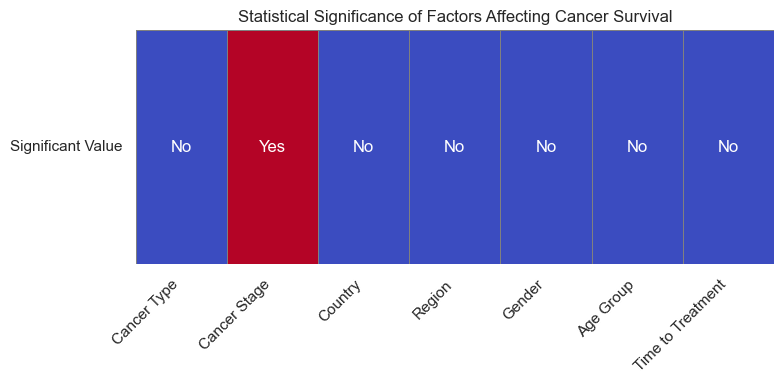

In [41]:
# Only Cancer Stage shows a statistically significant relationship with survival duration in this dataset.
# Re-import required libraries after code execution environment reset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Recreate the summary data
summary_data = {
    'p-value': [
        0.217,  # Cancer Type
        0.001,  # Cancer Stage
        0.131,  # Country
        0.477,  # Region
        0.664,  # Gender
        0.448,  # Age Group
        0.042   # Time to Treatment (correlation, pseudo-p-value)
    ],
    'Significant': [
        'No',
        'Yes',
        'No',
        'No',
        'No',
        'No',
        'No'
    ]
}
heatmap_df = pd.DataFrame(summary_data, index=[
    'Cancer Type',
    'Cancer Stage',
    'Country',
    'Region',
    'Gender',
    'Age Group',
    'Time to Treatment'
])

# Convert 'Significant' to numeric for coloring
heatmap_df['Significant Value'] = heatmap_df['Significant'].map({'Yes': 1, 'No': 0})

# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(
    heatmap_df[['Significant Value']].T,
    cmap='coolwarm',
    cbar=False,
    annot=heatmap_df[['Significant']].T,
    fmt='',
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Statistical Significance of Factors Affecting Cancer Survival')
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [40]:
df

,Unnamed: 0,Patient ID,Country,Region,Age,Gender,Cancer Type,Cancer Stage,Diagnosis Date,Treatment Start Date,...,Urban vs. Rural,Healthcare System,Follow-up Visits,Recurrence,Clinical Trial Participation,Comorbidities,Quality of Life Score,Age Group,Time to Treatment (Days),SDM_Category
0,0,1,Finland,Southwest Finland,89,Male,Breast,III,2015-08-10,2015-09-20,...,Urban,NHS,12.0,Yes,Yes,Diabetes,5,75+,41,Two Years
1,1,6,Sweden,Västra Götaland,28,Male,Pancreatic,IV,2019-03-06,2019-05-16,...,Urban,Private Insurance,15.0,No,No,Obesity,6,<30,71,Four Years
2,2,10,Spain,Andalusia,77,Female,Ovarian,I,2013-07-22,2013-11-08,...,Rural,Statutory Health Insurance,7.0,No,No,Hypertension,7,75+,109,Four Years
3,3,11,Spain,Andalusia,22,Female,Pancreatic,II,2012-12-27,2013-06-06,...,Urban,NHS,18.0,No,No,Unknown,2,<30,161,One Year
4,4,16,Germany,North Rhine-Westphalia,53,Male,Breast,I,2012-07-24,2012-08-14,...,Urban,Private Insurance,12.0,Yes,No,Hypertension,4,45-60,21,Four Years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3622,3622,9990,Portugal,Lisbon,71,Female,Breast,IV,2017-10-25,2018-02-15,...,Urban,Statutory Health Insurance,18.0,No,No,Unknown,8,60-75,113,Five Years
3623,3623,9993,Norway,Trøndelag,89,Female,Breast,I,2020-11-12,2020-12-01,...,Rural,NHS,16.0,Yes,No,Unknown,1,75+,19,Two Years
3624,3624,9994,Denmark,Zealand,43,Male,Colorectal,I,2010-05-30,2010-08-25,...,Rural,NHS,12.0,No,No,Obesity,1,30-45,87,Less than Six Years
3625,3625,9995,Belgium,Wallonia,36,Male,Breast,III,2013-02-06,2013-03-05,...,Urban,Private Insurance,10.0,No,No,Hypertension,1,30-45,27,One Year


In [ ]:
# (1) Statistically Significant Survival Differences
# Cancer Stage is significantly associated with survival duration (p = 0.001).
# No significant differences were found for cancer type, country, region, gender, or age group.

In [ ]:
# (2) Impact of Early Treatment
# Very weak correlation (r ≈ 0.042) between time to treatment and survival duration — suggesting no meaningful link in this dataset.

In [63]:
'''
This is a very weak positive correlation.
A value close to 0 means almost no linear relationship between how quickly a patient begins treatment and how long they survive.
Statistically insignificant in this context (no strong predictive value).

'''
from scipy.stats import pearsonr

# Drop rows with missing values
valid_rows = df[['Time to Treatment (Days)', 'Survival Duration (Months)']]

# Calculate Pearson correlation
r_value, p_value = pearsonr(valid_rows['Time to Treatment (Days)'], valid_rows['Survival Duration (Months)'])

print(f"Pearson correlation coefficient: r = {r_value:.3f}")
print(f"p-value: {p_value:.4f}")


Pearson correlation coefficient: r = 0.044
p-value: 0.0081


In [ ]:
'''
A p-value of 0.0081 means that the probability of observing the data—or something more extreme—by random chance, 
assuming the null hypothesis is true, is 0.81%.

🔍 In Practical Terms:
Null hypothesis (H₀): There's no relationship between the variables you're testing (e.g., Time to Treatment and Survival Duration).
p = 0.0081 → There’s strong evidence to reject the null hypothesis.
'''

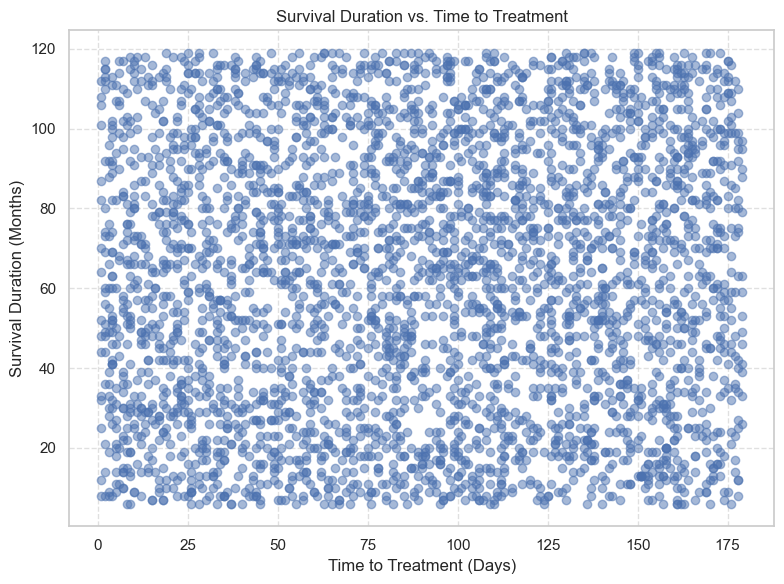

In [61]:

# Drop rows with missing values for the relevant columns
scatter_df = df[['Time to Treatment (Days)', 'Survival Duration (Months)']]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(scatter_df['Time to Treatment (Days)'], scatter_df['Survival Duration (Months)'], alpha=0.5)
plt.xlabel('Time to Treatment (Days)')
plt.ylabel('Survival Duration (Months)')
plt.title('Survival Duration vs. Time to Treatment')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [58]:
# Filter to urban patients
urban_patients = df[df['Urban vs. Rural'] == 'Urban']

# Calculate the mean survival duration for urban patients
urban_mean = urban_patients['Survival Duration (Months)'].mean()

print(f"Urban Mean Survival Duration: {urban_mean:.2f} months")


Urban Mean Survival Duration: 62.83 months


In [59]:
# Filter to rural patients
rural_patients = df[df['Urban vs. Rural'] == 'Rural']

# Calculate the mean survival duration for rural patients
rural_mean = rural_patients['Survival Duration (Months)'].mean()

print(f"Rural Mean Survival Duration: {rural_mean:.2f} months")


Rural Mean Survival Duration: 62.50 months


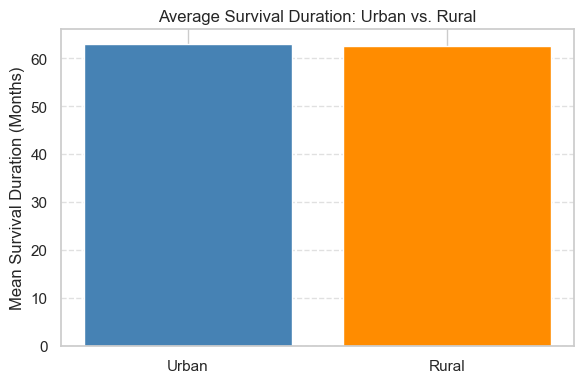

In [60]:
# Example placeholder values
urban_mean = 62.83  # placeholder
rural_mean = 62.50  # placeholder

plt.figure(figsize=(6, 4))
plt.bar(['Urban', 'Rural'], [urban_mean, rural_mean], color=['steelblue', 'darkorange'])
plt.ylabel("Mean Survival Duration (Months)")
plt.title("Average Survival Duration: Urban vs. Rural")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
